In [52]:
import json
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [53]:
btc_data_path  = "data/BCHAIN-MKPRU_refine.csv"
gold_data_path = "data/LBMA-GOLD_refine.csv"

# Data

In [54]:
btc_data  = pd.read_csv(btc_data_path).rename(columns={ 'Date': 'date', 'Value': 'btc' })
gold_data = pd.read_csv(gold_data_path).rename(columns={ 'Date': 'date', 'USD': 'gold' })

<AxesSubplot:xlabel='date'>

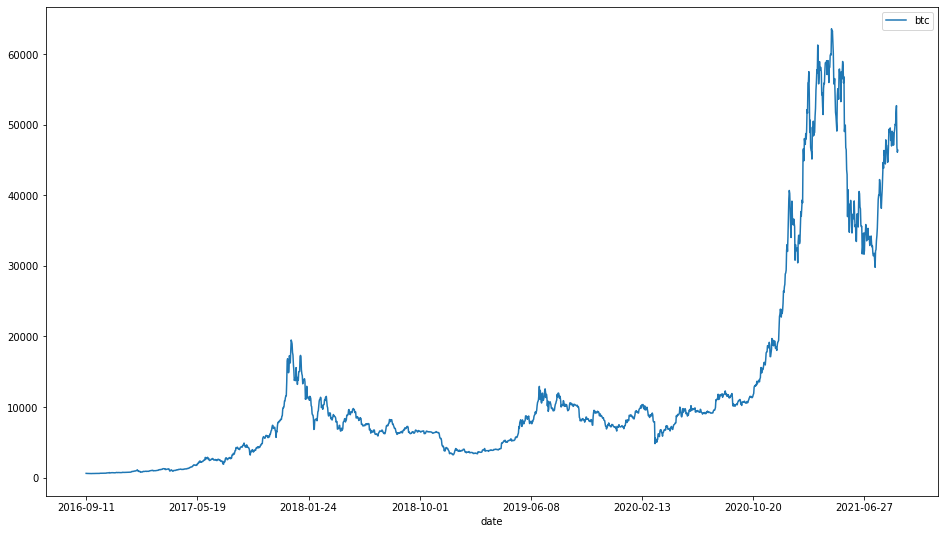

In [55]:
btc_data.set_index('date').plot(figsize=(16, 9))

<AxesSubplot:xlabel='date'>

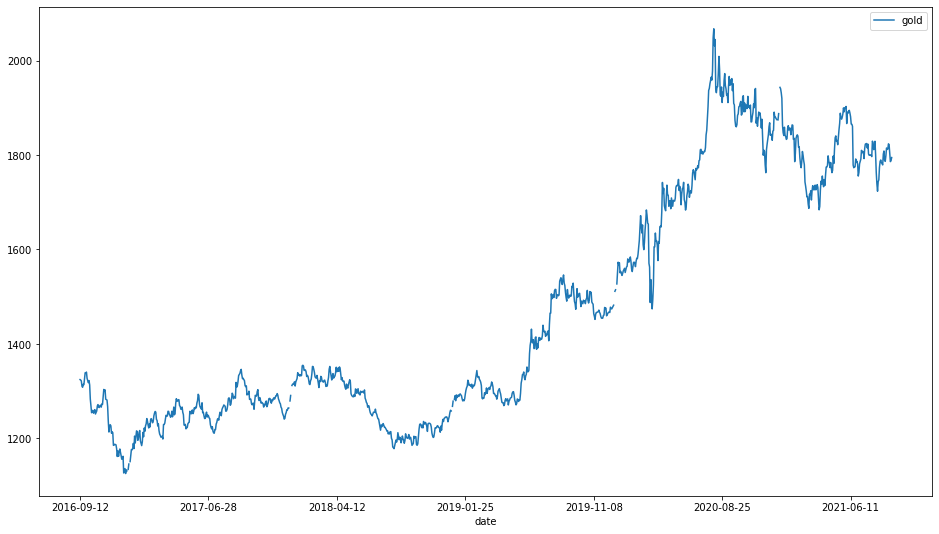

In [56]:
gold_data.set_index('date').plot(figsize=(16, 9))

## Data Processing

### Data Merge

In [57]:
data = pd.merge(left=btc_data, right=gold_data, how='left')
data.insert(data.shape[1], 'gold_tradable', ~np.asarray(data['gold'].isna()))

### Interpolation of Gold Prices

In [58]:
gold_inter = data.gold.interpolate(method='linear')
gold_inter[0] = gold_inter[1]

data.insert(data.shape[1] - 1, 'gold_inter', gold_inter)

### Calculation of Diffs

In [59]:
data.insert(data.shape[1], 'btc_diff', data['btc'].diff())
data.insert(data.shape[1], 'gold_diff', data['gold_inter'].diff())

# data['btc_diff'][0] = 0
# data['gold_diff'][0] = 0

### Setting Index

In [60]:
tdi = pd.DatetimeIndex(data.date)
data.set_index(tdi, inplace=True)
data.drop(columns=['date'], inplace=True)

In [61]:
data.to_csv("data/data.csv")
data

,btc,gold,gold_inter,gold_tradable,btc_diff,gold_diff
date,,,,,,
2016-09-11,621.65,NaN,1324.60,False,NaN,NaN
2016-09-12,609.67,1324.60,1324.60,True,-11.98,0.00
2016-09-13,610.92,1323.65,1323.65,True,1.25,-0.95
2016-09-14,608.82,1321.75,1321.75,True,-2.10,-1.90
2016-09-15,610.38,1310.80,1310.80,True,1.56,-10.95
...,...,...,...,...,...,...
2021-09-06,51769.06,1821.60,1821.60,True,1821.68,-0.70
2021-09-07,52677.40,1802.15,1802.15,True,908.34,-19.45
2021-09-08,46809.17,1786.00,1786.00,True,-5868.23,-16.15


## Seasonal Decomposition

## We first run a 

In [62]:
gold_decomposed = sm.tsa.seasonal_decompose(data.gold_inter)
btc_decomposed = sm.tsa.seasonal_decompose(data.btc)

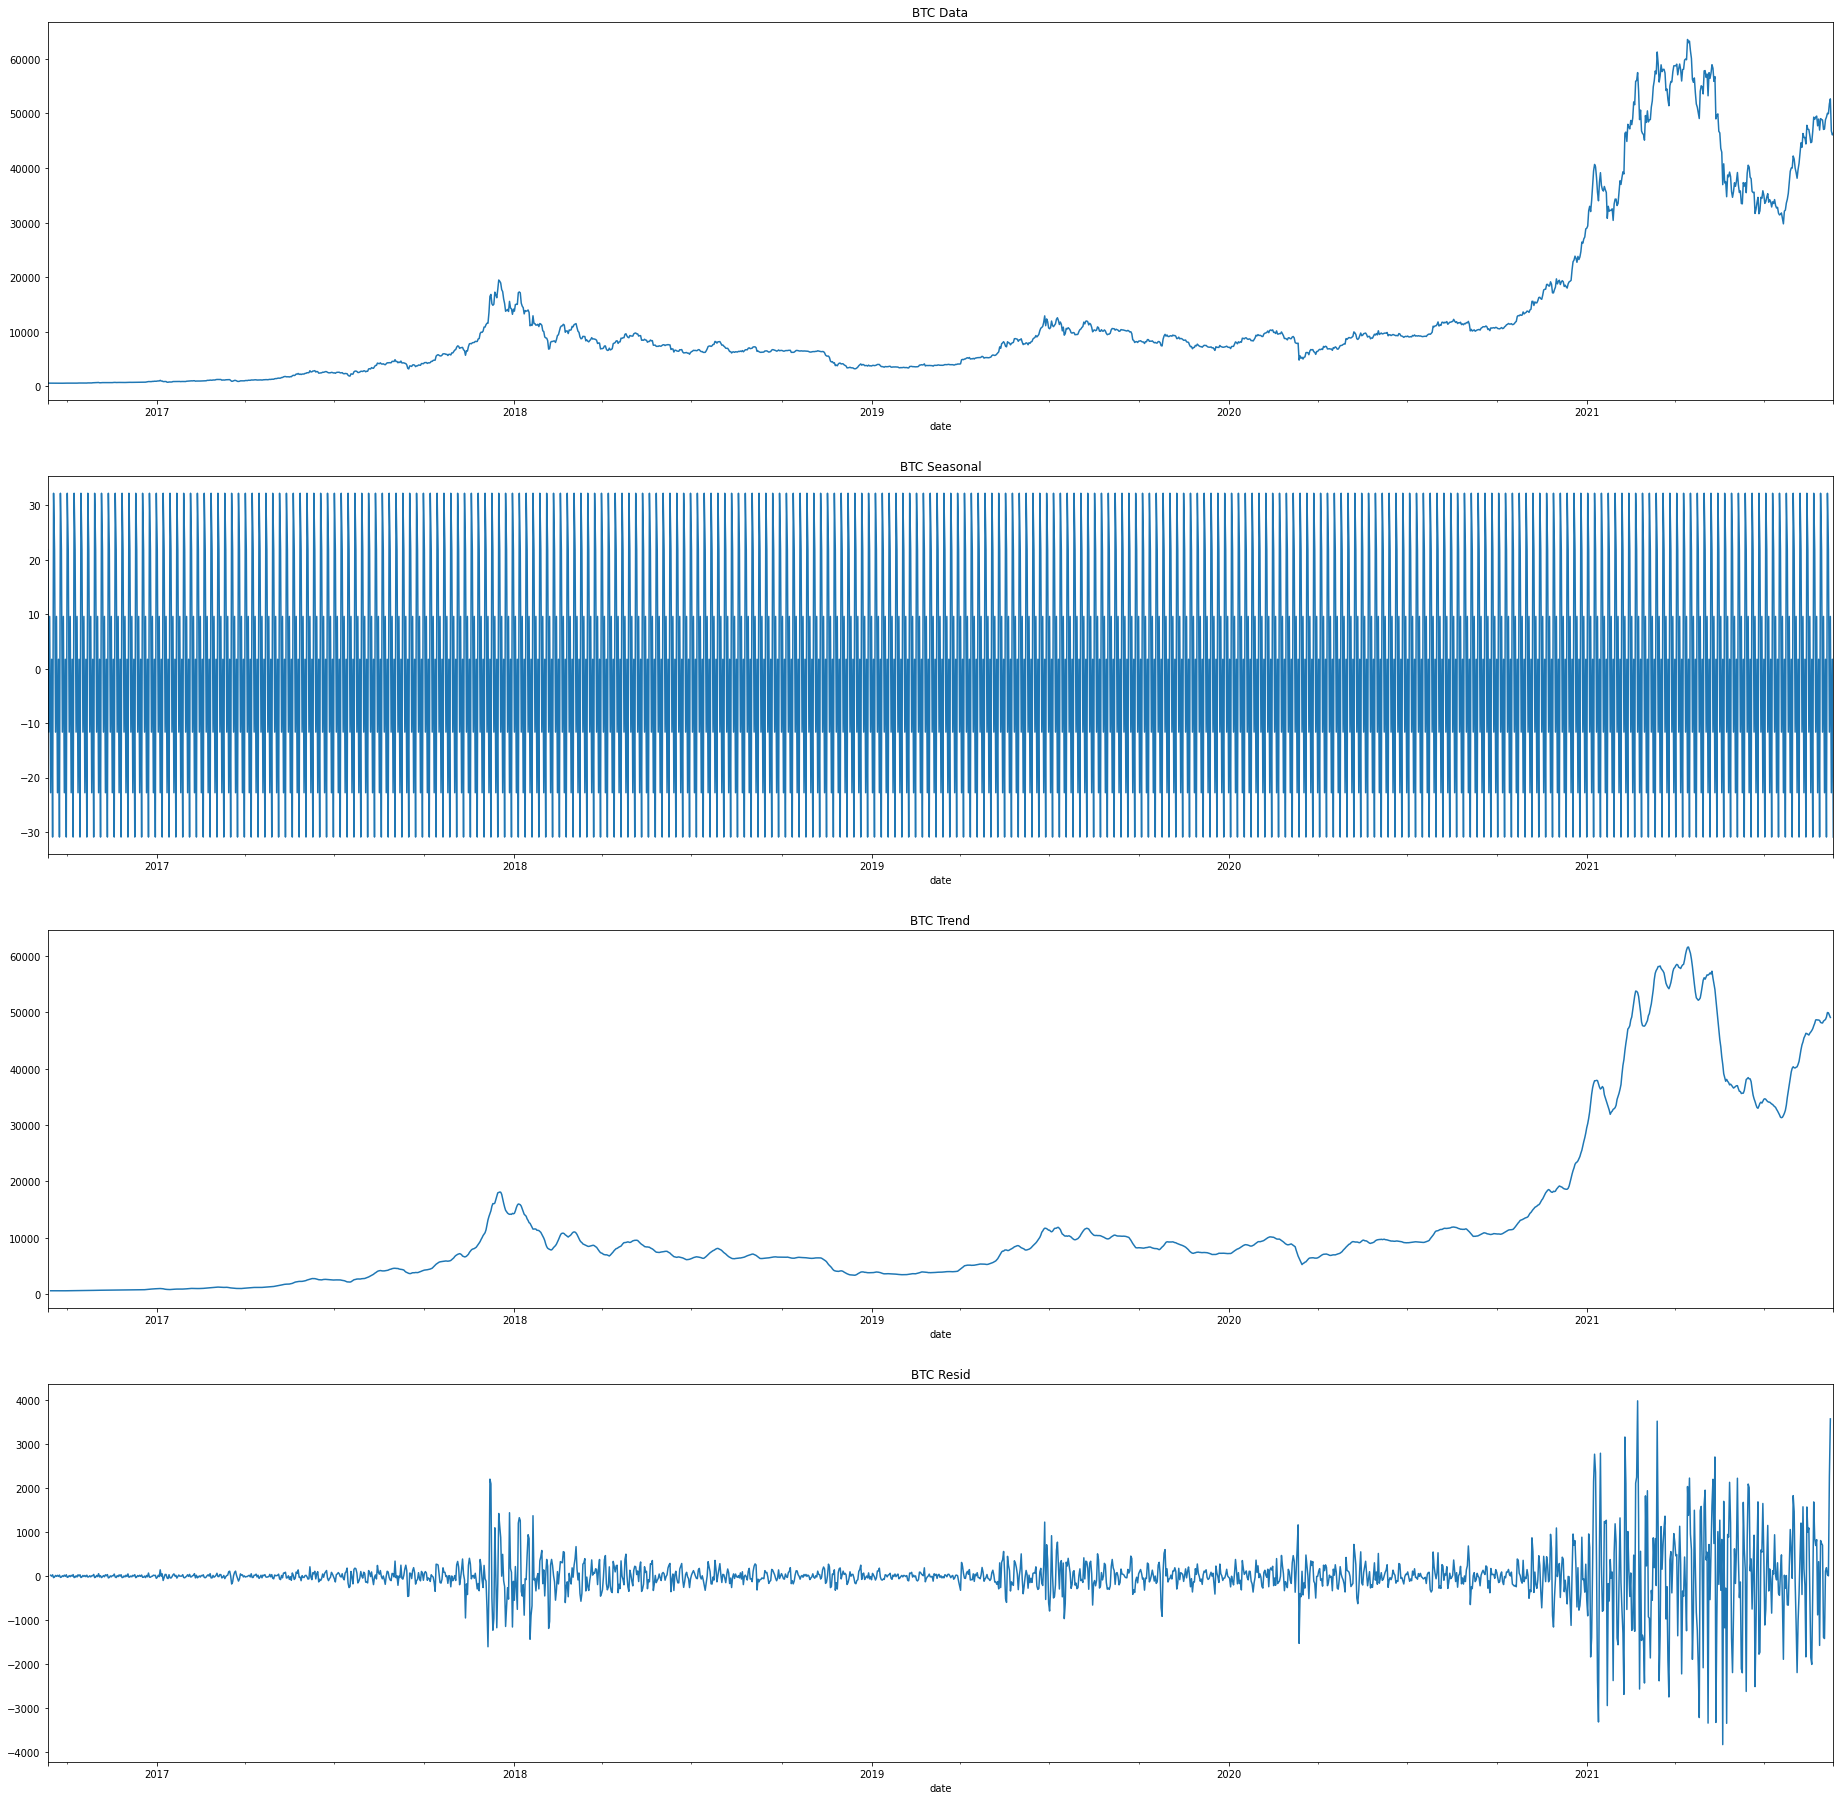

In [63]:
plt.figure(figsize=(32, 32))

plt.subplot(411)
plt.title("BTC Data")
data.btc.plot()

plt.subplot(412)
plt.title("BTC Seasonal")
btc_decomposed.seasonal.plot()

plt.subplot(413)
plt.title("BTC Trend")
btc_decomposed.trend.plot()

plt.subplot(414)
plt.title("BTC Resid")
btc_decomposed.resid.plot()

plt.savefig("data/tsa/btc.pdf")

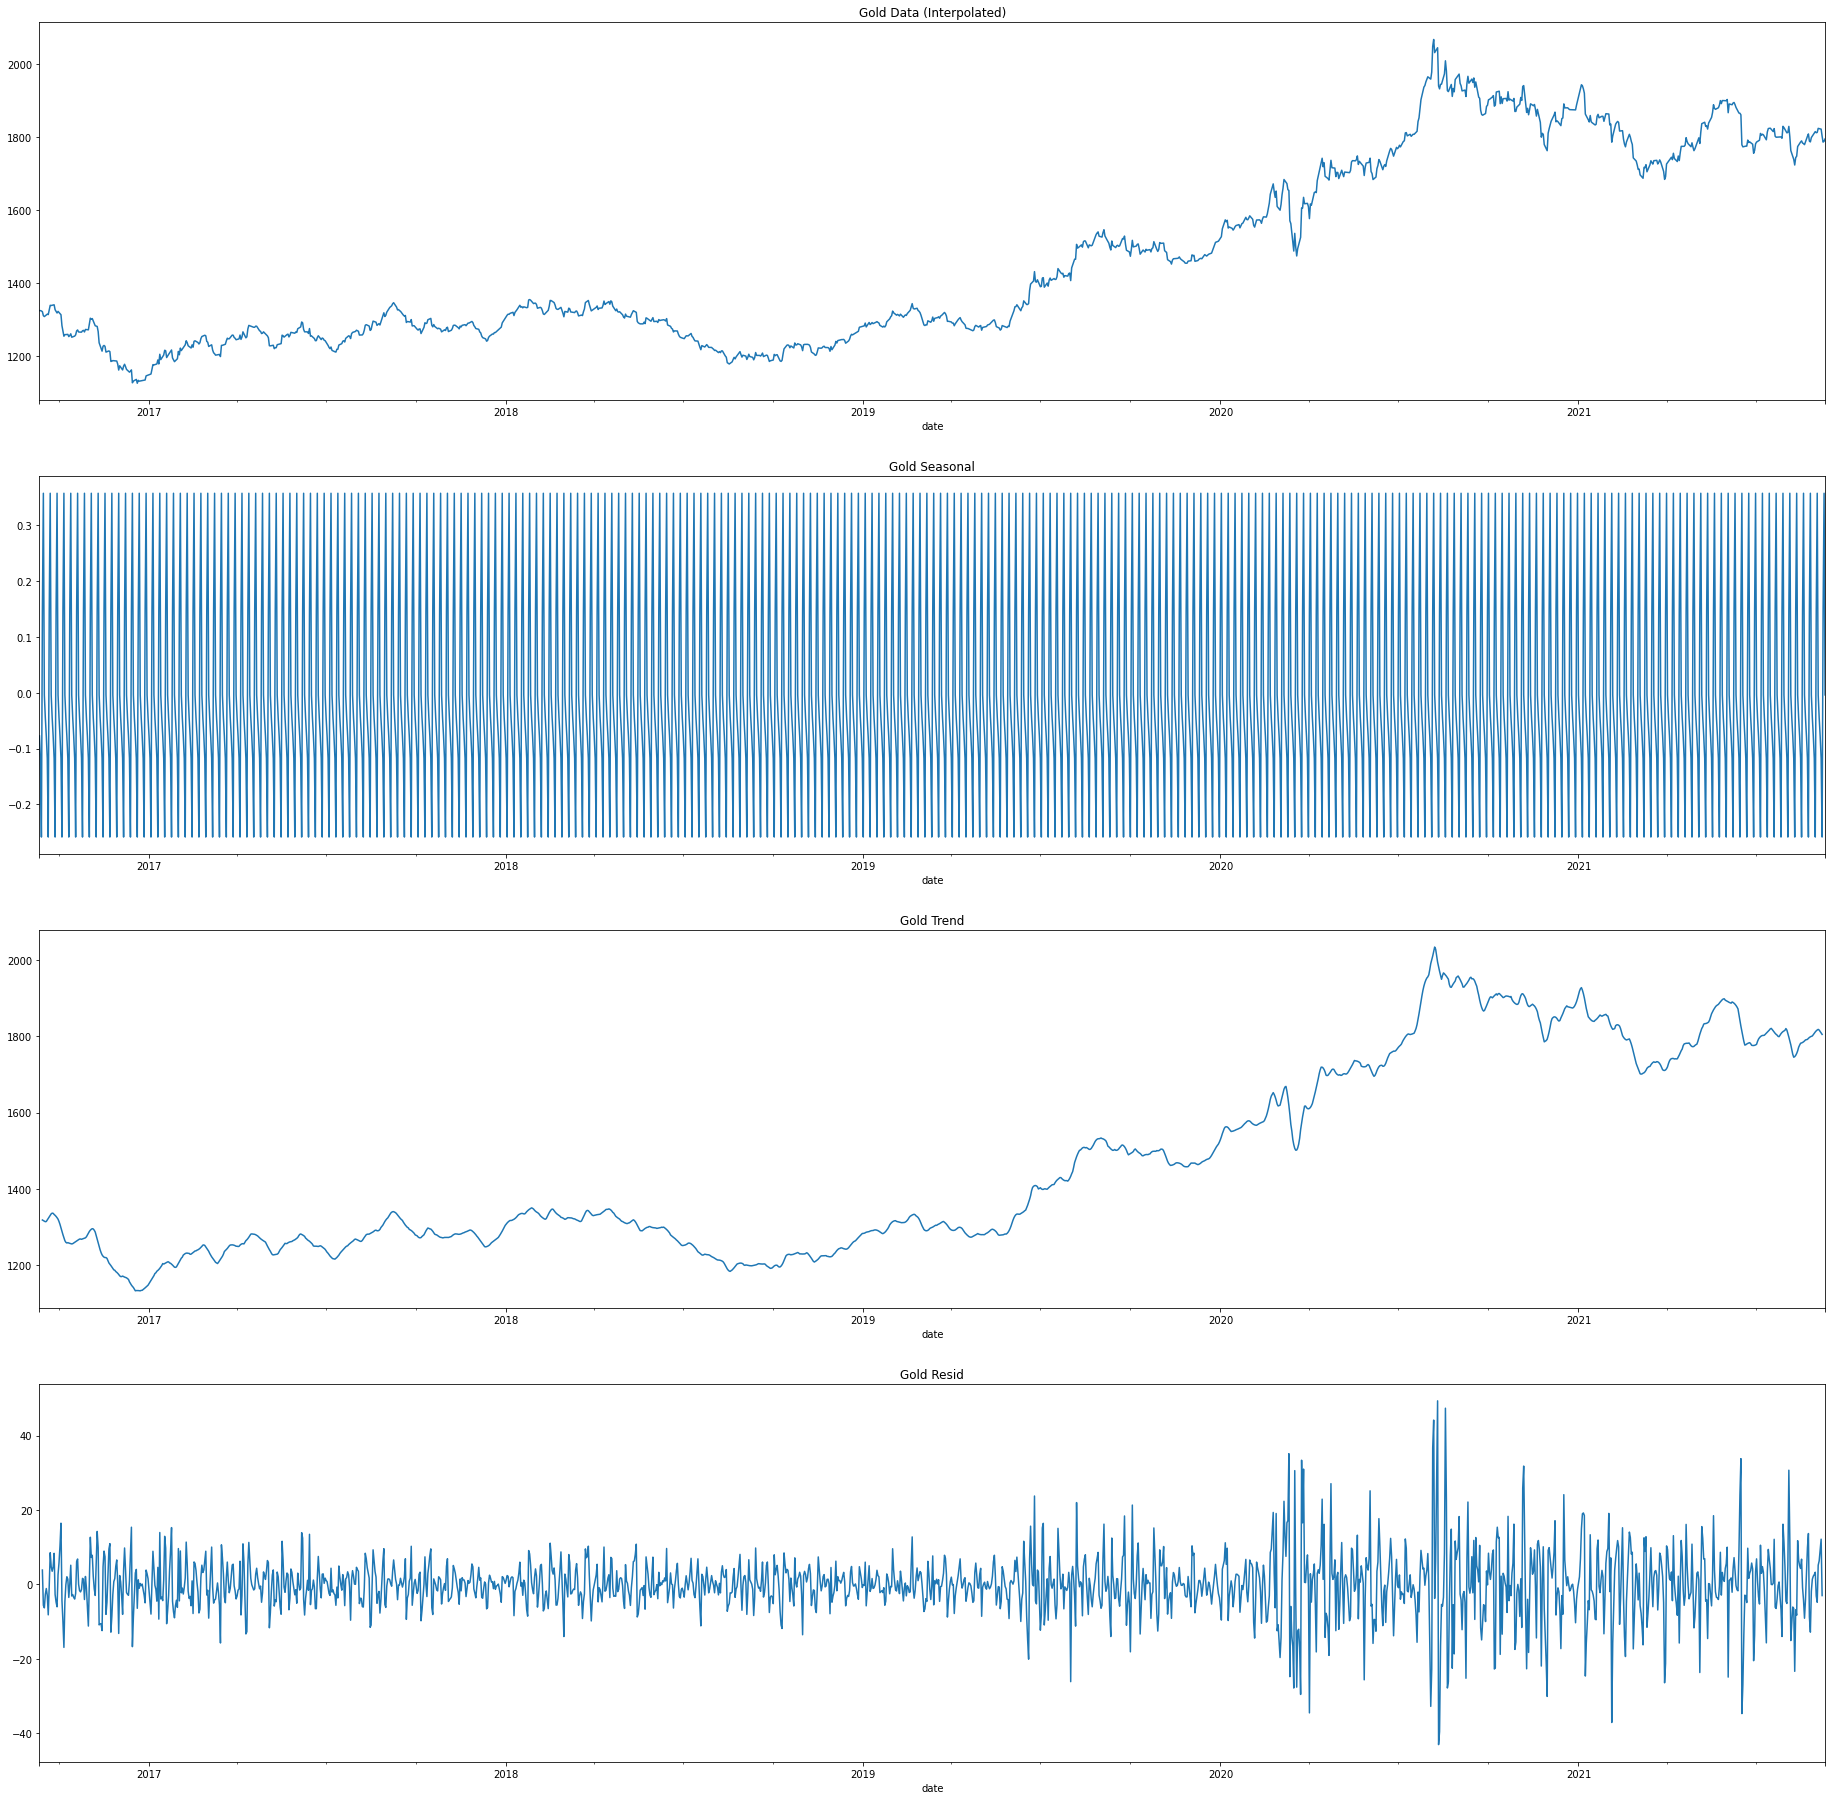

In [64]:
plt.figure(figsize=(32, 32))

plt.subplot(411)
plt.title("Gold Data (Interpolated)")
data.gold_inter.plot()

plt.subplot(412)
plt.title("Gold Seasonal")
gold_decomposed.seasonal.plot()

plt.subplot(413)
plt.title("Gold Trend")
gold_decomposed.trend.plot()

plt.subplot(414)
plt.title("Gold Resid")
gold_decomposed.resid.plot()

plt.savefig("data/tsa/gold_itp.pdf")